# Text Classification
 - https://realpython.com/python-keras-text-classification/

## 1. Choosing a Data Set

In [34]:
import pandas as pd

filepath_dict = {'yelp':   'dataset/yelp_labelled.txt',
                 'amazon': 'dataset/amazon_cells_labelled.txt',
                 'imdb':   'dataset/imdb_labelled.txt'}

df_list = []
for source, filepath in filepath_dict.items():
    df = pd.read_csv(filepath, names=['sentence', 'label'], sep='\t')
    df['source'] = source  # Add another column filled with the source name
    df_list.append(df)

df = pd.concat(df_list)
print(df.iloc[0])

sentence    Wow... Loved this place.
label                              1
source                          yelp
Name: 0, dtype: object


In [35]:
df

,sentence,label,source
0,Wow... Loved this place.,1,yelp
1,Crust is not good.,0,yelp
2,Not tasty and the texture was just nasty.,0,yelp
3,Stopped by during the late May bank holiday of...,1,yelp
4,The selection on the menu was great and so wer...,1,yelp
...,...,...,...
743,I just got bored watching Jessice Lange take h...,0,imdb
744,"Unfortunately, any virtue in this film's produ...",0,imdb
745,"In a word, it is embarrassing.",0,imdb
746,Exceptionally bad!,0,imdb


## 2. Defining a Baseline Model

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
sentences = df['sentence'].values
y = df['label'].values

In [70]:
sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size=0.25, random_state=1000)

In [71]:
from sklearn.feature_extraction.text import CountVectorizer

In [72]:
vectorizer = CountVectorizer()
vectorizer.fit(sentences_train)

CountVectorizer()

In [73]:
X_train = vectorizer.transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)
X_train

<2061x4506 sparse matrix of type '<class 'numpy.int64'>'
	with 23280 stored elements in Compressed Sparse Row format>

## 3. Your First Keras Model

In [74]:

from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [75]:
input_dim = X_train.shape[1]
input_dim

4506

In [76]:
model = Sequential()

In [77]:
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                45070     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 45,081
Trainable params: 45,081
Non-trainable params: 0
_________________________________________________________________


In [78]:
history = model.fit(X_train.toarray(), y_train,
                    epochs=100,
                    verbose=0,
                    validation_data=(X_test.toarray(), y_test),
                    batch_size=10)

In [79]:
loss, accuracy = model.evaluate(X_train.toarray(), y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))

Training Accuracy: 1.0000


In [80]:
loss, accuracy = model.evaluate(X_test.toarray(), y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Testing Accuracy:  0.7948


In [81]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [82]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

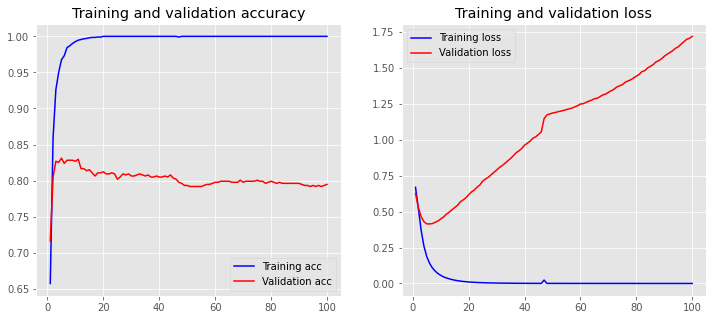

In [83]:
plot_history(history)